# **Laboratorio 7:** Segmentación de Imágenes
**Programa:** [Bootcamp en Visión Artificial para los ODS](https://github.com/EdwinTSalcedo/Bootcamp-Computer-Vision-for-the-SDGs) - **Autor:** [Edwin Salcedo](https://github.com/EdwinTSalcedo)


¡Bienvenido al septimo laboratorio 🤓 ! Ahora nos concentraremos en seccionar imágenes para extraer o cortar objetos o regiones con forma variable. De esta manera, podremos escoger áreas de interés aprovechando sus caracteristicas visuales como ser el color, los bordes, o la similaridad. Esta familia de métodos es conocida como **Metétodos de Segmentación** y tiene un número masivo de aplicaciones, incluyendo extracción de información a nivel de pixeles, la fusión de imágenes y los efectos especiales. 

<img src='https://media4.giphy.com/media/bYB9UXFGe83vwtOGLR/200w.gif?cid=ecf05e47uy5snvfd85d6ocvxzon5bo0bmhl3tmhchsw5esgg&rid=200w.gif&ct=v' width='50%'>

Registra los datos de tu equipo en esta sección al finalizar el laboratorio. 

**Nombre de equipo:**

**Miembros de equipo:**
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%)
- << nombre >> << apellido >> (Contribución sobre el 25%) 

## 1. Umbralización (Simple Thresholding)
La umbralización, también conocida como binarización, es el método de segmentación más simple. Este método evalúa el valor de cada píxel en una imagen con respecto a un umbral. Si un píxel es mayor al umbral, el método asigna el valor 1 al píxel, de lo contrario, el método asigna el valor 0. Estas reglas pueden cambiar en base al tipo de binarización que se este aplicando. Por ejemplo, OpenCV cuenta con 6 tipos básicos de binarización: BINARY, BINARY_INV, TRUNC, TOZERO, y TOZERO_INV. 


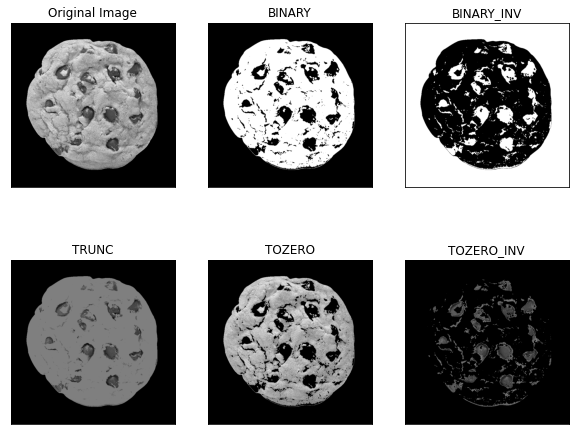

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

# Leer una imagen
img = cv2.imread('cookie.png',0)

# Aplicar seis de las cinco versiones existenes de binarización en OpenCV
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.rcParams["figure.figsize"] = (10,8)
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Además de estos métodos, OpenCV también cuenta con la implementación del Método de Otsu, el cual calcula automáticamente un umbral óptimo para separar píxeles del fondo (background) y píxeles de adelante (foreground). 

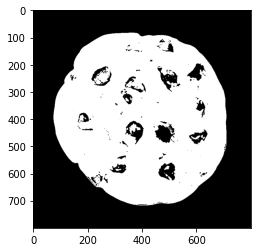

In [ ]:
img = cv2.imread('cookie.png',0)

ret, thresh6 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)

plt.imshow(thresh6, cmap="gray")

## **Ejercicio 1:** Método de Otsu

Para este ejercicio deberas implementar el método de Otsu desde cero utilizando únicamente la libreria Numpy. Al finalizar, deberas comparar el resultado de tu método y el resultado de aplicar el método de OpenCV con la siguiente imagen. 

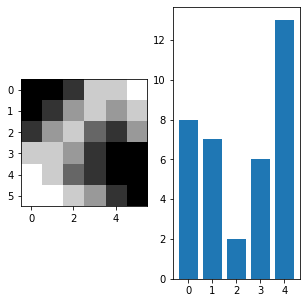

In [ ]:
ar1 = np.array([[0,0,1,4,4,5],
                  [0,1,3,4,3,4],
                  [1,3,4,2,1,3],
                  [4,4,3,1,0,0],
                  [5,4,2,1,0,0],
                  [5,5,4,3,1,0]])

# Generate the intensity histogram for the image
grey_levels = np.amax(ar1)
flatten = ar1.flatten()
hist, bin_edges = np.histogram(flatten,grey_levels)

x_pos = np.arange(len(hist))
bars = ('0', '1', '2', '3', '4','5')

plt.rcParams["figure.figsize"] = (5,5)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ar1,cmap="gray")
ax2.bar(range(0, grey_levels), hist.reshape(-1))
plt.xticks(x_pos, bars)

plt.show()

## 2. Umbralización por Color (Colour Thresholding)

La umbralización por color aprovecha la similaridad de los pixeles en base a su color. Es aplicable en diferentes espacios de color como RGB, HSV o CMYK. Un uso común para este método es seleccionar, separar e intercambiar un fondo verde para filmar videos con un fondo diferente. 

<img src='https://pbblogassets.s3.amazonaws.com/uploads/2019/07/29071701/green-screen-set.jpg' width='50%'>

In [ ]:
# Leer en la imagen
image = mpimg.imread('flag_green_screen.jpg')

# Mostrar las dimensiones de la imagen (alto, ancho y profundidad (color))
print('Image dimensions:', image.shape)

Image dimensions: (655, 800, 3)


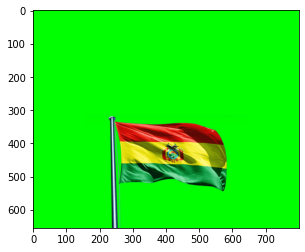

In [ ]:
# Mostrar la imagen
plt.imshow(image)

In [ ]:
# Definir los límites de selección de color en valores RGB
upper_green = np.array([180,255,180])
lower_green = np.array([0,240,0]) 

### Crear una máscara

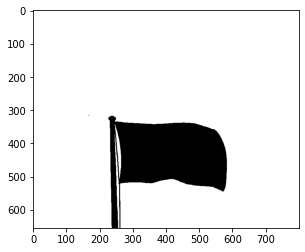

In [ ]:
# Definir el área enmascarada
mask = cv2.inRange(image, lower_green, upper_green)

# Visualisar la máscara
plt.imshow(mask, cmap='gray')

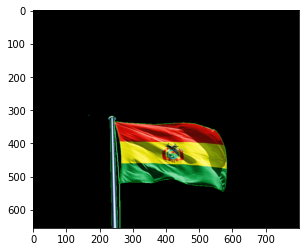

In [ ]:
# Enmascara la imagen para dejar ver la bandera
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# ¡Muéstralo!
plt.imshow(masked_image)

### Enmascarar y agregar una imagen de fondo

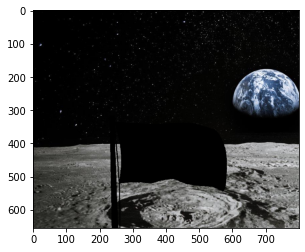

In [ ]:
# Cargar en una imagen de fondo
background_image = mpimg.imread('moon_background.jpg')
# background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB) (655, 800, 3)

background_image = background_image[0:655, 0:800]

masked_image2 = np.copy(background_image)

masked_image2[mask == 0] = [0, 0, 0]

plt.imshow(masked_image2)


### Crear una imagen completa

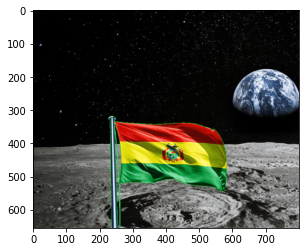

In [ ]:
complete_image = masked_image + masked_image2

plt.imshow(complete_image)


### Espacio de color HSV

El método de umbralización anterior es muy útil cuando se tiene una imagen/video con secciones de color uniformes, pero puede tener problemas cuando uno requiere seleccionar secciones con brillo, sombras o colores variables.

Las imágenes RGB están formadas por combinaciones de rojo, verde y azul. Entonces, puedes pensar en RGB como un **espacio de color 3D** si representamos todos los valores posibles en un sistema de coordenadas cartesiano para un espacio tridimensional. Como podras notar, seleccionar un rango de colores en este espacio no es una tarea sencilla. 

<img src='https://drive.google.com/uc?id=14s-GcR-QdXXlUkuceEKOcvB4q159A0Rv' width='70%'>

Para estos casos, podemos utilizar el espacios de colores HSV, el cual toma en cuenta el Tono (H), Saturación (S), y Valor (V) al definir colores. De estos tres canales, el canal H almacena el valor del color puro y se mantiene muy consistente sin importar las sombras o brillo excesivo, por lo que nos ayudara más a encontrar objetos con colores variables. Para el siguiente ejemplo, haremos uso de HSV para detectar globos. 

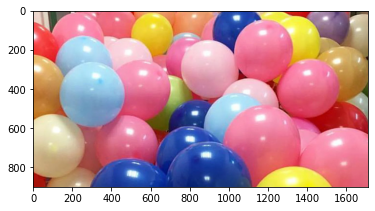

In [ ]:
# Leer en la imagen
image = cv2.imread('ballons.jpg')

# Cambiar color a RGB (desde BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Separar canales de color

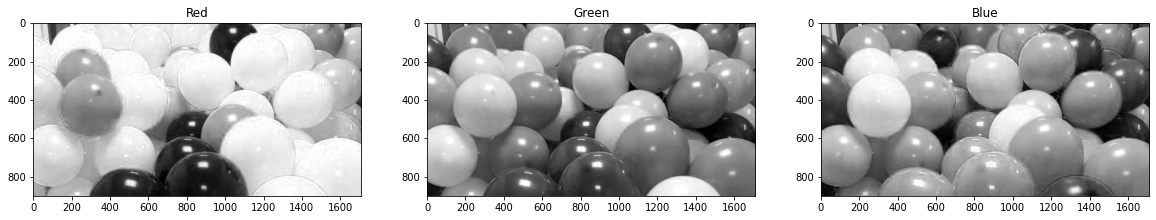

In [ ]:
# Canales RGB
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

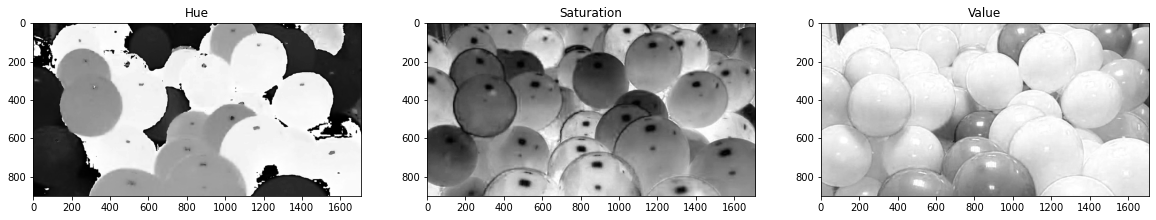

In [ ]:
# Convertir de RGB a HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV canales
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

### Enmascarar la imagen en RGB

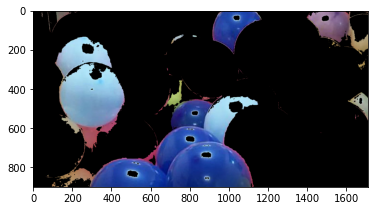

In [ ]:
# Definir nuestros criterios de selección de color en valores RGB
lower_blue = np.array([0,0,80]) 
upper_blue = np.array([180,255,255])

# Defina el área enmascarada en el espacio RGB
mask_rgb = cv2.inRange(image, lower_blue, upper_blue)

# Enmascarar la imagen
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Ver la máscara
plt.imshow(masked_image)

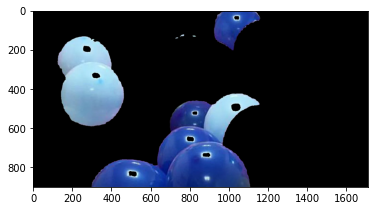

In [ ]:
# Definir nuestros criterios de selección de color en valores HSV
lower_hue = np.array([80,40,40]) 
upper_hue = np.array([130,255,255])

# ¡Ahora prueba el HSV!
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Defina el área enmascarada en el espacio HSV
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# Enmascarar la imagen
masked_image_hsv = np.copy(image)
masked_image_hsv[mask_hsv==0] = [0,0,0]

# Ver la máscara
plt.imshow(masked_image_hsv)

## **Ejercicio 2:** Día y Noche
Imagina que te dan un conjunto de imágenes de paisajes como el siguiente:

<img src='https://drive.google.com/uc?id=1xZrzYeEmLqh2qnCoIGdM7hRbKOhXRia6' width='70%'>


Implementa un clasificador básico para identificar si una imagen fue tomada de día o de noche. Luego, prueba tu clasificador con varias imágenes. Dada una imagen, tu algoritmo debería generar como resultado a uno de los siguientes mensajes cortos: "noche" o "día".

## 3. Segmentación Watershed

El objetivo principal del método Watershed es encontrar límites entre regiones, concidas como, "cuencas de captación". Cualquier imagen puede verse como una topología, donde este método tratara a las regiones uniformes como cuencas. Por otro lado, las secciones de alta intensidad seran consideradas picos. Luego, el método continuara con el relleno de estas cuencas iterativamente para que podamos encontrar los límites que se cruzan entre dos o más cuencas. Ambos bordes, los picos y límites generados, nos permitiran encontrar divisiones exactas entre secciones de la image.

La segmentación mediante Watershed funciona mejor si puede identificar o "marcar" los objetos de primer plano y las regiones pertenecientes al fondo. La implementación del algoritmo en OpenCV, hace uso de la estrategía mencionada, ademas también propone controlar la definición de regiones en base a marcadores. En consecuencia elimina regiones que no tengan marcadores (falsos positivos). Este método sigue la siguiente estrategia:

- Convertir la imagen a escala de grises.

- Calcular una imagen binarizada. Esta es una imagen cuyas regiones blancas deberan ser los objetos que intenta segmentar.

- Calcular marcadores de primer plano. Estas son manchas (pequeñas regiones) de píxeles conectadas dentro de cada uno de los objetos.

- Aplicar erosión a la imagen binarizada para que solo tenga mínimos en las ubicaciones de los marcadores de primer plano.

- Aplicar el método de Watershed con la imagen original, tomando en cuenta a los marcadores como regiones de partida. 

255


Text(0.5, 1.0, 'Overlapped')

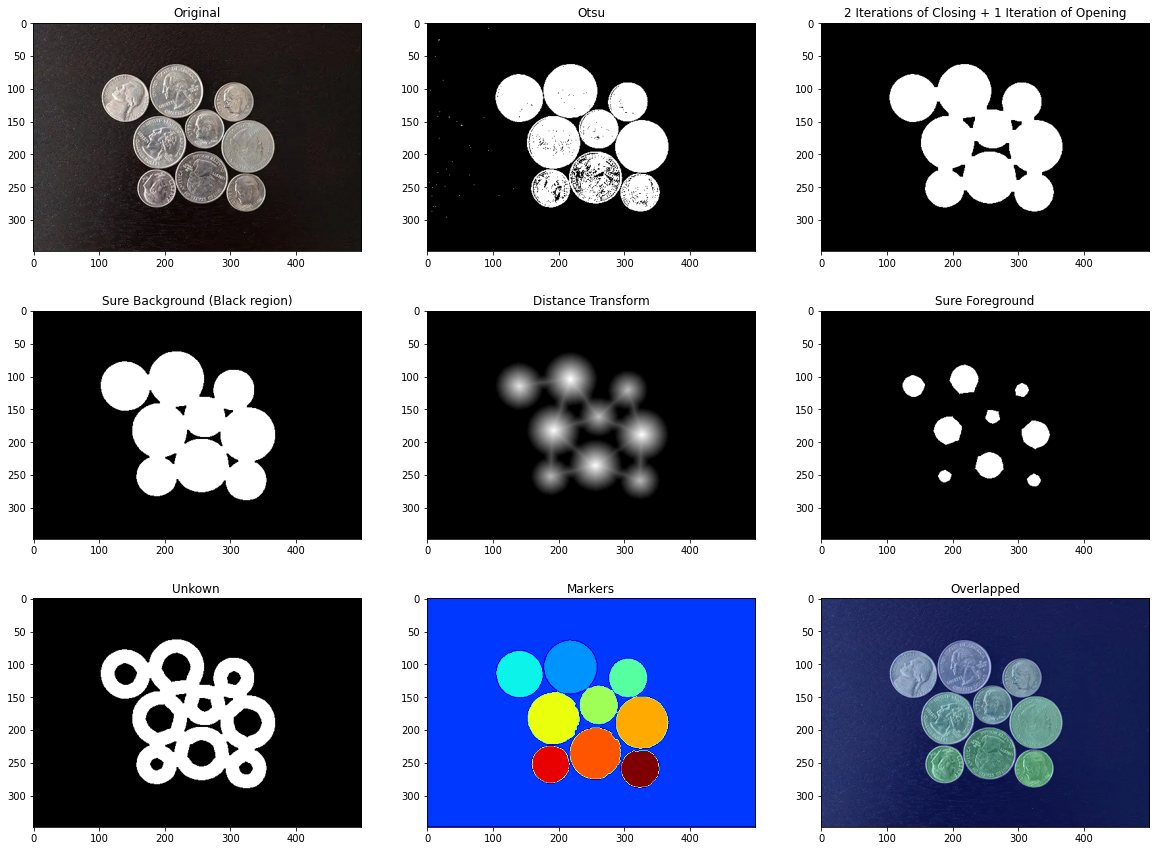

In [ ]:
# Importar una imagen
image = cv2.imread("coins.jpeg") 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
base_image = np.copy(image)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Obtener la versión binarizada de la imagen
ret, thresh = cv2.threshold(grayscale,0,255,cv2.THRESH_OTSU)
# Eliminación de ruido con Cierre (Closing) y Apertura (Opening)
structuring_element = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, structuring_element, iterations = 2)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, structuring_element, iterations = 1)

# Encontrar el area del fondo (background)
sure_bg = cv2.dilate(opening, structuring_element, iterations=1)

# Encontrar el area del primer plano (foreground)
# DistanceTransform reemplaza el valor de cada píxel por su distancia al píxel de fondo (background) más cercano
# Recibe como parametros a una imagen binaria, función de la distancia, tamaño del kernel
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) 
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)

# Encontrar región desconocida
unknown = cv2.subtract(sure_bg,sure_fg)

# Etiquetar regiones iniciales (marcadores)
ret, markers = cv2.connectedComponents(sure_fg)
# Agregue uno a todas las etiquetas para que el fondo seguro no se confunda con el marcador de etiqueta 1
markers = markers+1
# Definir a la región desconocida con pixeles cero
markers[unknown==255] = 0

# Aplicar segmentación Watershed
watershed = cv2.watershed(image,markers)
# Watershed asigna el valor -1 a los pixeles limitantes de regiones, por lo cual 
# asignaremos el color rojo
image[watershed == -1] = [255,0,0]

# Mostrar las imágenes
plt.rcParams["figure.figsize"] = (20,15)

# Primera fila
fig, ax = plt.subplots(3, 3)
ax[0][0].imshow(base_image)
ax[0][0].set_title("Original")
ax[0][1].imshow(thresh, cmap = "gray")
ax[0][1].set_title("Otsu")
ax[0][2].imshow(opening, cmap = "gray")
ax[0][2].set_title("2 Iterations of Closing + 1 Iteration of Opening")

# Segunda fila
ax[1][0].imshow(sure_bg, cmap = "gray")
ax[1][0].set_title("Sure Background (Black region)")
ax[1][1].imshow(dist_transform, cmap = "gray")
ax[1][1].set_title("Distance Transform")
ax[1][2].imshow(sure_fg, cmap = "gray")
ax[1][2].set_title("Sure Foreground")

# Tercera fila
ax[2][0].imshow(unknown, cmap = "gray")
ax[2][0].set_title("Unkown ")
ax[2][1].imshow(markers, cmap = "jet")
ax[2][1].set_title("Markers")
ax[2][2].imshow(base_image)
ax[2][2].imshow(watershed, cmap = "winter",alpha=0.3)
ax[2][2].set_title("Overlapped")


## **Ejercicio 3:** Imágenes Satelitales
Día a día, muchos agricultores de todo el mundo luchan por ahorrar agua para sus cultivos, por lo que diferentes métodos de riego se inventaron en los últimos siglos. El riego de pivote central (Centre Pivot Irrigation) utiliza potentes bombas de agua que son capaces de bombear agua hasta 7 kilómetros en un área circular. Esto hace que las áreas regadas adquieran la forma de círculos verdes. Sorprendentemente, el radio de cada círculo es de alrededor de 3,5 km.

En esta ocasion, imagine que se le proporcionó un conjunto de imágenes satelitales que representan subsecciones de una región masiva que actualmente cultiva vegetales y usa riego de pivote central. Su tarea es calcular el porcentaje de campos de cultivo que actualmente es productivo y tambien el que no es productivo. Para iniciar con este trabajo, deberá trabajar únicamente con la siguiente imagen satelital, pero esta le dará una idea de cómo procesar varias imágenes para comprender si la región agrícola de un país es productiva o no.

Imagen:
https://drive.google.com/file/d/1HBFMUzkGrpm4pxXEHK_I6hmebWW-ZXnH/view?usp=sharing

El resultado de su algoritmo deberia mostrar valores aproximado en porcentajes, del campo sembrado y del campo no sembrado (no aprovechado) en la imagen. 

Ref: https://lifeinsaudiarabia.net/why-do-they-make-circular-crop-fields-in-saudi-arabia/

## **Ejercicio 4:** Segmentación Watershed

Para este ejercicio, tendrás que implementar la segmentación Watershed para encontrar las secciones con mandarinas. Implemente todos los pasos de preprocesamiento necesarios para mejorar sus resultados. El resultado de este ejercicio deberia retornar una etiqueta, "recolectar" en el caso de que una gran mayoria de mandarinas este madura, o "maduración", en el caso de que una gran mayoria de mandarinas no esten maduras aún. Puedes usar un umbral si es necesario. 

Puedes usar la siguiente imagen como ejemplo:

<img src='https://www.ocregister.com/wp-content/uploads/migration/kz1/kz19bp-b78614312z.120100309130458000gq5n305a.1.jpg?w=1200' width='50%'>